# K-means聚类算法

## 核心思想

**K-Means**是一种无监督学习（Unsupervised Learning）算法，常用于数据聚类（Clustering）。它的目标是将数据划分为$K$个不同的簇（clusters），使得同一簇内的数据点彼此更相似，而不同簇的数据点差异较大。从而实现数据聚类的目的。

## K-means 的算法步骤

1. **随机初始化**: 设定簇的数量$K$，并从数据中随机选择$K$个数据点作为初始簇中心（Centroids）。

2. **计算距离，分配样本到最近的簇**: 计算每个数据点到$K$个簇中心的距离（通常使用欧氏距离），将其分配给最近的簇。

3. **更新簇中心**: 计算每个簇中所有数据点的均值，并将均值作为新的簇中心。

4. **重复步骤 2 和 3，直到收敛**: 如果簇中心不再发生变化，或者达到最大迭代次数，算法停止。

## K-means的目标函数——簇内平方和WCSS
$$WCSS = \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2$$
其中：
- $K$ 是簇的数量
- $C_i$ 是第$i$个簇
- $\mu_i$ 是第$i$个簇的中心
- $||x - \mu_i||^2$是数据点$x$到簇中心的平方距离

K-Means算法 通过最小化簇内平方和（Within-Cluster Sum of Squares, WCSS） 来优化聚类效果。

## K-means的评价指标——轮廓系数

**轮廓系数**是评估聚类效果的重要指标，能够综合衡量样本在**簇内紧密度**和**簇间分离度**的平衡。与簇内平方和（WCSS）不同，它不仅依赖簇内距离，还能反映聚类结果的**局部合理性**，尤其适用于K值选择困难或数据分布复杂的情况。轮廓系数的取值范围在$[-1,1]$之间，值越高表示聚类效果越好

### 数学公式

#### 簇内平均距离（ Cohesion ）

簇内平均距离衡量样本$i$到同簇内其他所有点的平均距离（即簇内相似度）

$$a(i) = \frac{1}{|C| - 1} \sum_{j \in C, j \neq i} d(i, j)$$
其中，
- $C$是样本$i$所在的簇
- $d(i, j)$表示点$i$到点$j$之间的距离
- $a(i)$值越小，表示点$i$和同簇样本越接近，聚类效果越好

#### 簇间最小平均距离（ Separation ）

簇间最小平均距离衡量样本$i$到其他簇的所有样本的平均距离，并取最小值。

$$b(i) = \min_{C' \neq C} \frac{1}{|C'|} \sum_{j \in C'} d(i, j)$$
其中，
- $C'$是不包含样本$i$的其他簇
- $b(i)$值越大，表示点$i$离其他簇越远，聚类效果越好

#### 单个样本的轮廓系数

单个样本的轮廓系数计算公式为：

$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

- $s(i)$越接近 1，表示点$i$被正确聚类
- $s(i)$越接近 0，表示点$i$可能处于簇的边界，不太确定归属
- $s(i)$低于 0，表示点$i$可能被错误聚类

#### 轮廓系数

对所有样本的轮廓系数求平均，则得到最终的轮廓系数计算公式为：
$$S = \frac{1}{N} \sum_{i=1}^{N} s(i)$$

其中，
- $N$是数据点总数
- $S$越高，表示聚类效果越好

### 轮廓系数性质

- 轮廓系数计算基于簇内相似度（a）和簇间距离（b）
- 轮廓系数用于评估聚类质量，范围 [-1,1]
- $S$越高，表示聚类效果越好
- 适用于 K-Means，但对非球形簇效果较差

### sklearn计算——silhouette_score()

- `X`: 输入样本数据
- `labels`: 每个样本对应的簇标签
- `metric`: 距离计算方式（默认 euclidean）
- `random_state`: 随机数种子，用于保证结果可复现

## 优缺点分析
### K-means优点
- **简单高效：** 在样本数量较少或维度较低时效果很好。
- **收敛速度快：** 在适合的初始中心选择下，K-means 通常可以较快收敛。

### K-means缺点
- **对初始点敏感：** 对初始点敏感：初始簇中心的选择对最终结果影响较大。
- **只能发现球形簇：** K-means 假设每个簇是凸形且大小相近，不能处理非球形的簇。
- **对离群点敏感：** 对离群点敏感：离群点会影响簇的中心计算。
- **需要手动指定K值：** 需要手动指定K值也即聚类个数。

## 如何确定最佳K值——肘部法则

**肘部法则（Elbow Method）**是K-means聚类中用于确定最佳簇数（K值）的经典方法。其核心思想是通过观察簇内平方和（WCSS）随K值变化的拐点（形似“手肘”）来选择最优K值。

### 实现步骤

- **计算不同K值的WCSS**：
    - 对K从1到预设最大值（如10）进行K-means聚类，记录每次的WCSS值。

- **绘制WCSS-K曲线**：
    - 横轴为K值，纵轴为对应的WCSS值，绘制WCSS-K曲线，观察曲线形状。

- **寻找“肘部”拐点**：
    - 选择曲线从陡峭下降转为平缓变化的拐点作为最佳K值。

# K-means算法实现

## KMeans

- `n_clusters`: 指定要生成的簇数（K值）
- `n_init`: 随机初始化的次数（最终选择WCSS最小的结果）
- `random_state`: 随机数种子，控制质心初始化的随机性，使结果可复现

## Iris鸢尾花数据集

Iris鸢尾花数据集是一个经典的机器学习数据集，包含了三种鸢尾花（Setosa, Versicolor, Virginica）的不同特征，每个花种有 50 个样本，总共有 150 个样本
- sepal_length：花萼长度
- sepal_width：花萼宽度
- petal_length：花瓣长度
- petal_width：花瓣宽度
- species：花种

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


iris = load_iris() # 加载鸢尾花数据集
X = iris.data # 自变量
y = iris.target  # 因变量
feature_names = iris.feature_names # 特征名称
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 实际案例的代码实现

### 数据标准化（K-means对尺度敏感）

In [5]:
scaler = StandardScaler() # 创建 StandardScaler 实例
X_scaled = scaler.fit_transform(X) # 对数据进行标准化转换

### 确定最佳K值（肘部法则）

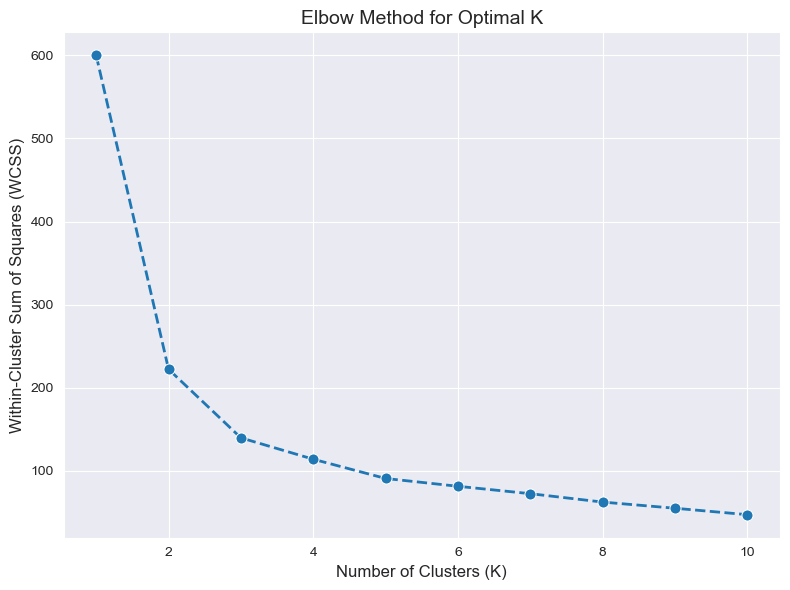

In [6]:
# 初始化 WCSS（Within-Cluster Sum of Squares）列表
wcss = []

# 计算不同 K 值的 WCSS
for k in range(1, 11):  # 选择 K 从 1 到 10
    kmeans = KMeans(
        n_clusters=k,  # 指定簇的数量 K
        n_init=10,  # 随机初始化次数设置为10
        random_state=42  # 设定随机种子，保证实验可复现
    )
    kmeans.fit(X_scaled)  # 训练 KMeans 模型
    wcss.append(kmeans.inertia_)  # 记录 WCSS（簇内误差平方和）

# 设置 Seaborn 的绘图风格（暗色网格风格）
sns.set_style("darkgrid")

# 创建画布，设置大小
plt.figure(figsize=(8, 6))

# 绘制肘部法则曲线（Elbow Method）
sns.lineplot(
    x=range(1, 11),  # X 轴为 K 取值范围（1 到 10）
    y=wcss,  # Y 轴为 WCSS 值
    marker='o',  # 在数据点处绘制圆形标记
    markersize=8,  # 设置标记的大小
    linestyle='--',  # 使用虚线连接数据点
    linewidth=2,  # 线条宽度
)

# 添加横轴、纵轴标签和标题
plt.xlabel('Number of Clusters (K)', fontsize=12)  # X 轴标签：聚类数 K
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)  # Y 轴标签：簇内误差平方和
plt.title('Elbow Method for Optimal K', fontsize=14)  # 标题：寻找最优 K

# 调整布局，使图表显示更加美观
plt.tight_layout()

# 显示图表
plt.show()

### 执行K-means聚类（选择K=3）

In [7]:
# 创建 KMeans 模型，指定超参数
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# 在标准化后的数据集上训练 KMeans 模型
kmeans.fit(X_scaled)

# 获取每个样本的簇标签
labels = kmeans.labels_

### 计算轮廓系数

In [8]:
silhouette_avg = silhouette_score(X_scaled, labels) # # 计算轮廓系数
print(f"[评估结果] 轮廓系数 = {silhouette_avg:.2f}（越接近1效果越好）")

[评估结果] 轮廓系数 = 0.46（越接近1效果越好）


### 数据降维与可视化

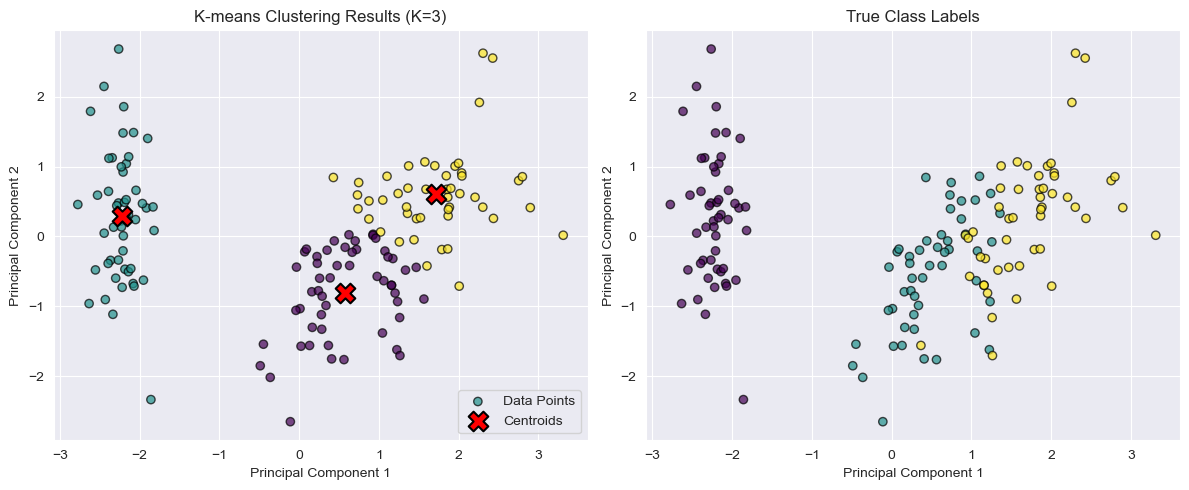

In [9]:
# 使用 PCA 将数据降维到 2 维
pca = PCA(n_components=2)  # 指定降维到 2 维
X_pca = pca.fit_transform(X_scaled)  # 在标准化后的数据上拟合 PCA 并转换数据

# 将 K-Means 质心从标准化空间转换到 PCA 空间
centroids_scaled = kmeans.cluster_centers_  # 获取 K-Means 聚类后的簇中心（仍在标准化空间中）
centroids_pca = pca.transform(centroids_scaled)  # 通过 PCA 转换到 2D 空间

# 绘制聚类结果与真实类别对比
plt.figure(figsize=(12, 5))  # 设置画布大小

# 子图 1：K-Means 聚类结果
plt.subplot(1, 2, 1)  # 创建子图（1行2列，第1个子图）

# 画出数据点，颜色代表 K-Means 聚类的类别
plt.scatter(
    X_pca[:, 0],  # 提取 PCA 降维后的第一主成分（作为横坐标）
    X_pca[:, 1],  # 提取 PCA 降维后的第二主成分（作为纵坐标）
    c=labels,     # 颜色按照 K-Means 聚类分配的类别进行分类
    cmap='viridis',  # 使用 Viridis 颜色映射（从黄到紫的渐变色）
    edgecolor='k',   # 设置数据点的边缘颜色为黑色 ('k' 代表 black)
    alpha=0.7,       # 设置透明度为 0.7（数值越小越透明，越大越不透明）
    label='Data Points'  # 设置图例标签，方便后续 `plt.legend()` 使用
)


# 画出 K-Means 计算出的质心（红色 X）
plt.scatter(
    centroids_pca[:, 0],  # 取 PCA 降维后的第一主成分（作为横坐标）
    centroids_pca[:, 1],  # 取 PCA 降维后的第二主成分（作为纵坐标）
    marker='X',  # 设定数据点的形状为 'X'，用于标记聚类中心
    s=200,       # 设定点的大小为 200（比普通数据点大，便于突出显示）
    c='red',     # 设定颜色为红色，强调聚类中心
    edgecolor='k',  # 设置边缘颜色为黑色，增强可视化对比
    linewidth=1.5,  # 设定边缘线宽度为 1.5，增强质心的辨识度
    label='Centroids'  # 设置图例标签，方便 `plt.legend()` 使用
)


# 设置横纵坐标轴标签，注明 PCA 解释的方差信息
plt.xlabel('Principal Component 1', fontsize=10)
plt.ylabel('Principal Component 2', fontsize=10)

# 添加标题和图例
plt.title('K-means Clustering Results (K=3)', fontsize=12)
plt.legend()

# 子图 2：真实类别分布
plt.subplot(1, 2, 2)  # 创建子图（1行2列，第2个子图）

# 画出数据点，颜色代表真实类别
plt.scatter(
    X_pca[:, 0],  # 取 PCA 降维后的第一主成分（作为横坐标）
    X_pca[:, 1],  # 取 PCA 降维后的第二主成分（作为纵坐标）
    c=y,          # 颜色按照真实类别标签 y 进行分类（用于对比 K-Means 聚类结果）
    cmap='viridis',  # 使用 Viridis 颜色映射（从黄到紫的渐变色）
    edgecolor='k',   # 设置数据点的边缘颜色为黑色 ('k' 代表 black)
    alpha=0.7        # 设置透明度为 0.7（数值越小越透明，越大越不透明）
)


# 设置坐标轴标签
plt.xlabel('Principal Component 1', fontsize=10)
plt.ylabel('Principal Component 2', fontsize=10)

# 添加标题
plt.title('True Class Labels', fontsize=12)

# 调整布局 & 显示图像
plt.tight_layout()  # 自动调整子图间距，避免重叠
plt.show()  # 显示图像